In [1]:
import cv2
import matplotlib.pyplot as plt 

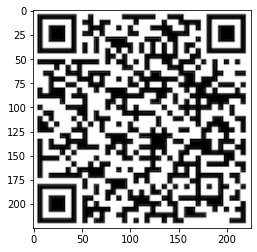

In [19]:
qr_image = cv2.imread('imageqr.png')
plt.imshow(qr_image)

In [20]:
#initializing the QRcode detector
detector = cv2.QRCodeDetector()

In [21]:
detector.detectAndDecode(qr_image)

('<a href="https://github.com/wpdo/doqrcode">https://github.com/wpdo/doqrcode</a>',
 array([[[  4.,   4.],
         [219.,   4.],
         [219., 219.],
         [  4., 219.]]], dtype=float32),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 255, 255, ..., 255, 255,   0],
        [  0, 255,   0, ...,   0, 255,   0],
        ...,
        [  0, 255,   0, ..., 255,   0,   0],
        [  0, 255, 255, ..., 255, 255,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

In [22]:
data, bbox, straight_qrcode =detector.detectAndDecode(qr_image)

QR detected
QRCode data:>> <a href="https://github.com/wpdo/doqrcode">https://github.com/wpdo/doqrcode</a>


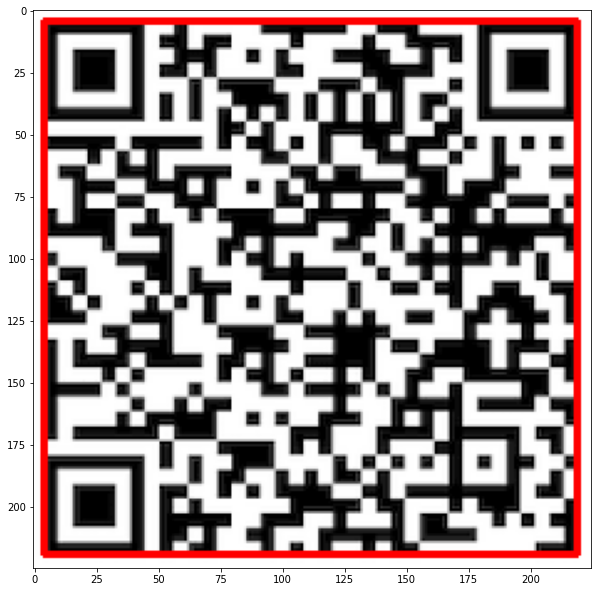

In [23]:
if bbox is not None:
    print('QR detected')
    print(f"QRCode data:>> {data}")
    bbox = bbox[0]
    n_lines = len(bbox) # first element of the array so that we are able to loop through
    bbox_int = bbox.astype(int) # bbox = [[[float, float]]], thus we need to convert it to int 
    for i in range(n_lines):
    #     # draw all lines
        point1 = tuple(bbox_int[[i][0]])
        point2 = tuple(bbox_int[[(i+1) % n_lines] [0]])
        cv2.line(qr_image, point1, point2, color=(255, 0, 0), thickness=2)
    plt.figure(figsize=(10,15))
    plt.imshow(qr_image)
    plt.show()
else:
    print("QR code not detected")